In [17]:
# 필요한 모듈 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 텐서플로우 모듈
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.losses import binary_crossentropy, CategoricalCrossentropy

In [64]:
from keras.datasets import fashion_mnist

In [65]:
fashion_dict ={0 : 'T-shirt/top',
1 : 'Trouser',
2 : 'Pullover',
3 : 'Dress',
4 : 'Coat',
5 : 'Sandal',
6 : 'Shirt',
7 : 'Sneaker',
8 : 'Bag',
9 : 'Ankel boot',}

In [66]:
(x_train_full, y_train_full),(x_test, y_test) = fashion_mnist.load_data()

In [67]:
x_train, x_val, y_train, y_val = \
    train_test_split(x_train_full, y_train_full, random_state=42)

Shirt


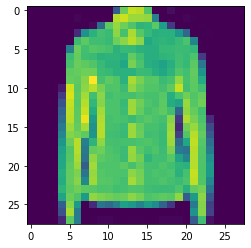

In [68]:
plt.imshow(x_train[0])
print(fashion_dict[y_train[0]])

In [69]:
from keras.layers import Flatten

In [70]:
x_train

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 181,   0,   0],
        [  0,   0,   0, ..., 212,   0,   0],
        [  0,   0,   0, ..., 108,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [71]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [72]:
# x_train --> Flatten --> Dense --> Dense --> Dense --> Dense

In [74]:
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

model1 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(2048, activation = 'relu'),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(output_shape, activation = 'softmax')
        
    ])

model2 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(2048, activation = 'sigmoid'),
        Dense(1024, activation = 'sigmoid'),
        Dense(512, activation = 'sigmoid'),
        Dense(output_shape, activation = 'softmax')
        
    ])

In [78]:
for i in range(1, len(model1.layers)):
    model2.layers[i].set_weights([model1.layers[i].get_weights()[0],
                                  model1.layers[i].get_weights()[1]])
np.sum(model1.layers[1].get_weights()[0]) == np.sum(model2.layers[1].get_weights()[0])

True

In [79]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model1.compile(optimizer = optimizer,
               loss = loss,
               metrics= metrics)

model2.compile(optimizer = optimizer,
               loss = loss,
               metrics= metrics)

In [85]:
model1.fit(x_train,
           y_train,
           epochs=30,
           batch_size=400,
           verbose = 0)

model2.fit(x_train,
           y_train,
           epochs=30,
           batch_size=400,
           verbose = 0)

In [82]:
print(model1.evaluate(x_test, y_test))
print(model2.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.4553 - accuracy: 0.8766
[0.45533207058906555, 0.8766000270843506]
313/313 [==============================] - 1s 3ms/step - loss: 0.5474 - accuracy: 0.7964
[0.5473549365997314, 0.7964000105857849]


In [88]:
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

model3 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(output_shape, activation = 'softmax')
        
    ])

model4 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(2048, activation = 'relu'),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(output_shape, activation = 'softmax')
        
    ])

In [90]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model3.compile(optimizer = optimizer,
               loss = loss,
               metrics= metrics)

model4.compile(optimizer = optimizer,
               loss = loss,
               metrics= metrics)

In [91]:
model3.fit(x_train,
           y_train,
           epochs=30,
           batch_size=400,
           verbose = 0)

model4.fit(x_train,
           y_train,
           epochs=30,
           batch_size=400,
           verbose = 0)

In [92]:
print(model3.evaluate(x_test, y_test))
print(model4.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8676
[0.4469723105430603, 0.8676000237464905]
313/313 [==============================] - 1s 3ms/step - loss: 0.4750 - accuracy: 0.8737
[0.47499334812164307, 0.8737000226974487]


In [93]:
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

model5 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(output_shape, activation = 'softmax')
        
    ])

model6 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(2048, activation = 'relu'),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(output_shape, activation = 'softmax')
        
    ])

In [94]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model5.compile(optimizer = optimizer,
               loss = loss,
               metrics= metrics)

model6.compile(optimizer = optimizer,
               loss = loss,
               metrics= metrics)

In [95]:
model5.fit(x_train,
           y_train,
           epochs=10,
           batch_size=400,
           verbose = 0)

model6.fit(x_train,
           y_train,
           epochs=10,
           batch_size=400,
           verbose = 0)

In [96]:
print(model5.evaluate(x_test, y_test))
print(model6.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.8584
[0.4561493694782257, 0.8583999872207642]
313/313 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8640
[0.3837832808494568, 0.8640000224113464]


In [97]:
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

model7 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(2048, activation = 'relu'),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(output_shape, activation = 'softmax')
        
    ])

model8 = Sequential(
    [
        Flatten(input_shape = input_shape),
        Dense(2048, activation = 'relu'),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(output_shape, activation = 'softmax')
        
    ])

In [102]:
optimizer ='sgd'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model7.compile(
    optimizer = optimizer,
    loss= loss,
    metrics= metrics)


model8.compile(
    optimizer = optimizer,
    loss= loss,
    metrics= metrics)

In [100]:
model7.fit(x_train,
           y_train,
           epochs= 20,
           batch_size = len(x_train),
           verbose =0)

model8.fit(x_train,
           y_train,
           epochs= 20,
           batch_size = 400,
           verbose =0)

In [101]:
print(model7.evaluate(x_test, y_test))
print(model8.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
[nan, 0.10000000149011612]
313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
[nan, 0.10000000149011612]
